# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
x

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


import matplotlib.pyplot as plt

df = pd.read_csv('df_prep_scikitlearn.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 33 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   sexo                                    16650 non-null  int64  
 1   posse_de_veiculo                        16650 non-null  int64  
 2   posse_de_imovel                         16650 non-null  int64  
 3   qtd_filhos                              16650 non-null  int64  
 4   idade                                   16650 non-null  float64
 5   tempo_emprego                           16650 non-null  float64
 6   possui_celular                          16650 non-null  int64  
 7   possui_fone_comercial                   16650 non-null  int64  
 8   possui_fone                             16650 non-null  int64  
 9   possui_email                            16650 non-null  int64  
 10  qt_pessoas_residencia                   16650 non-null  fl

In [60]:
df.mau = df.mau.astype(int)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 33 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   sexo                                    16650 non-null  int64  
 1   posse_de_veiculo                        16650 non-null  int64  
 2   posse_de_imovel                         16650 non-null  int64  
 3   qtd_filhos                              16650 non-null  int64  
 4   idade                                   16650 non-null  float64
 5   tempo_emprego                           16650 non-null  float64
 6   possui_celular                          16650 non-null  int64  
 7   possui_fone_comercial                   16650 non-null  int64  
 8   possui_fone                             16650 non-null  int64  
 9   possui_email                            16650 non-null  int64  
 10  qt_pessoas_residencia                   16650 non-null  fl

In [61]:
y = df.mau
x = df.drop('mau', axis=1)
x.sexo.value_counts()
y.value_counts()

0    16260
1      390
Name: mau, dtype: int64

In [62]:
clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(x, y)
clf


DecisionTreeClassifier(random_state=100)

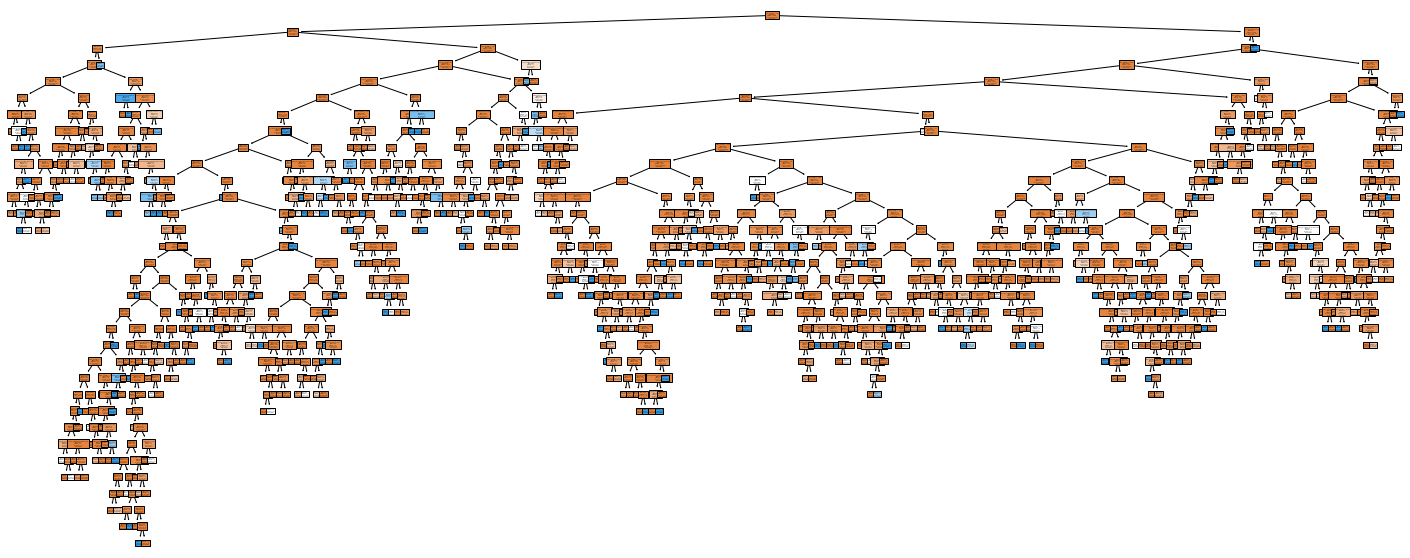

In [63]:
plt.figure(figsize=(25, 10))
plot_tree(clf,
          filled=True,
          class_names=['bom', 'mau'],
          feature_names=x.columns);

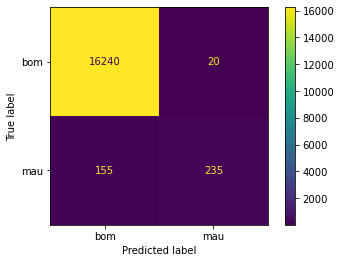

In [64]:
predictions = clf.predict(x)
cm = confusion_matrix(y, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['bom', 'mau'])
disp.plot()

In [65]:
accuracy_score(y, predictions)

0.9894894894894894

In [66]:
#SEPARANDO TREINO E TESTE

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)


#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [67]:
clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(x_train, y_train)


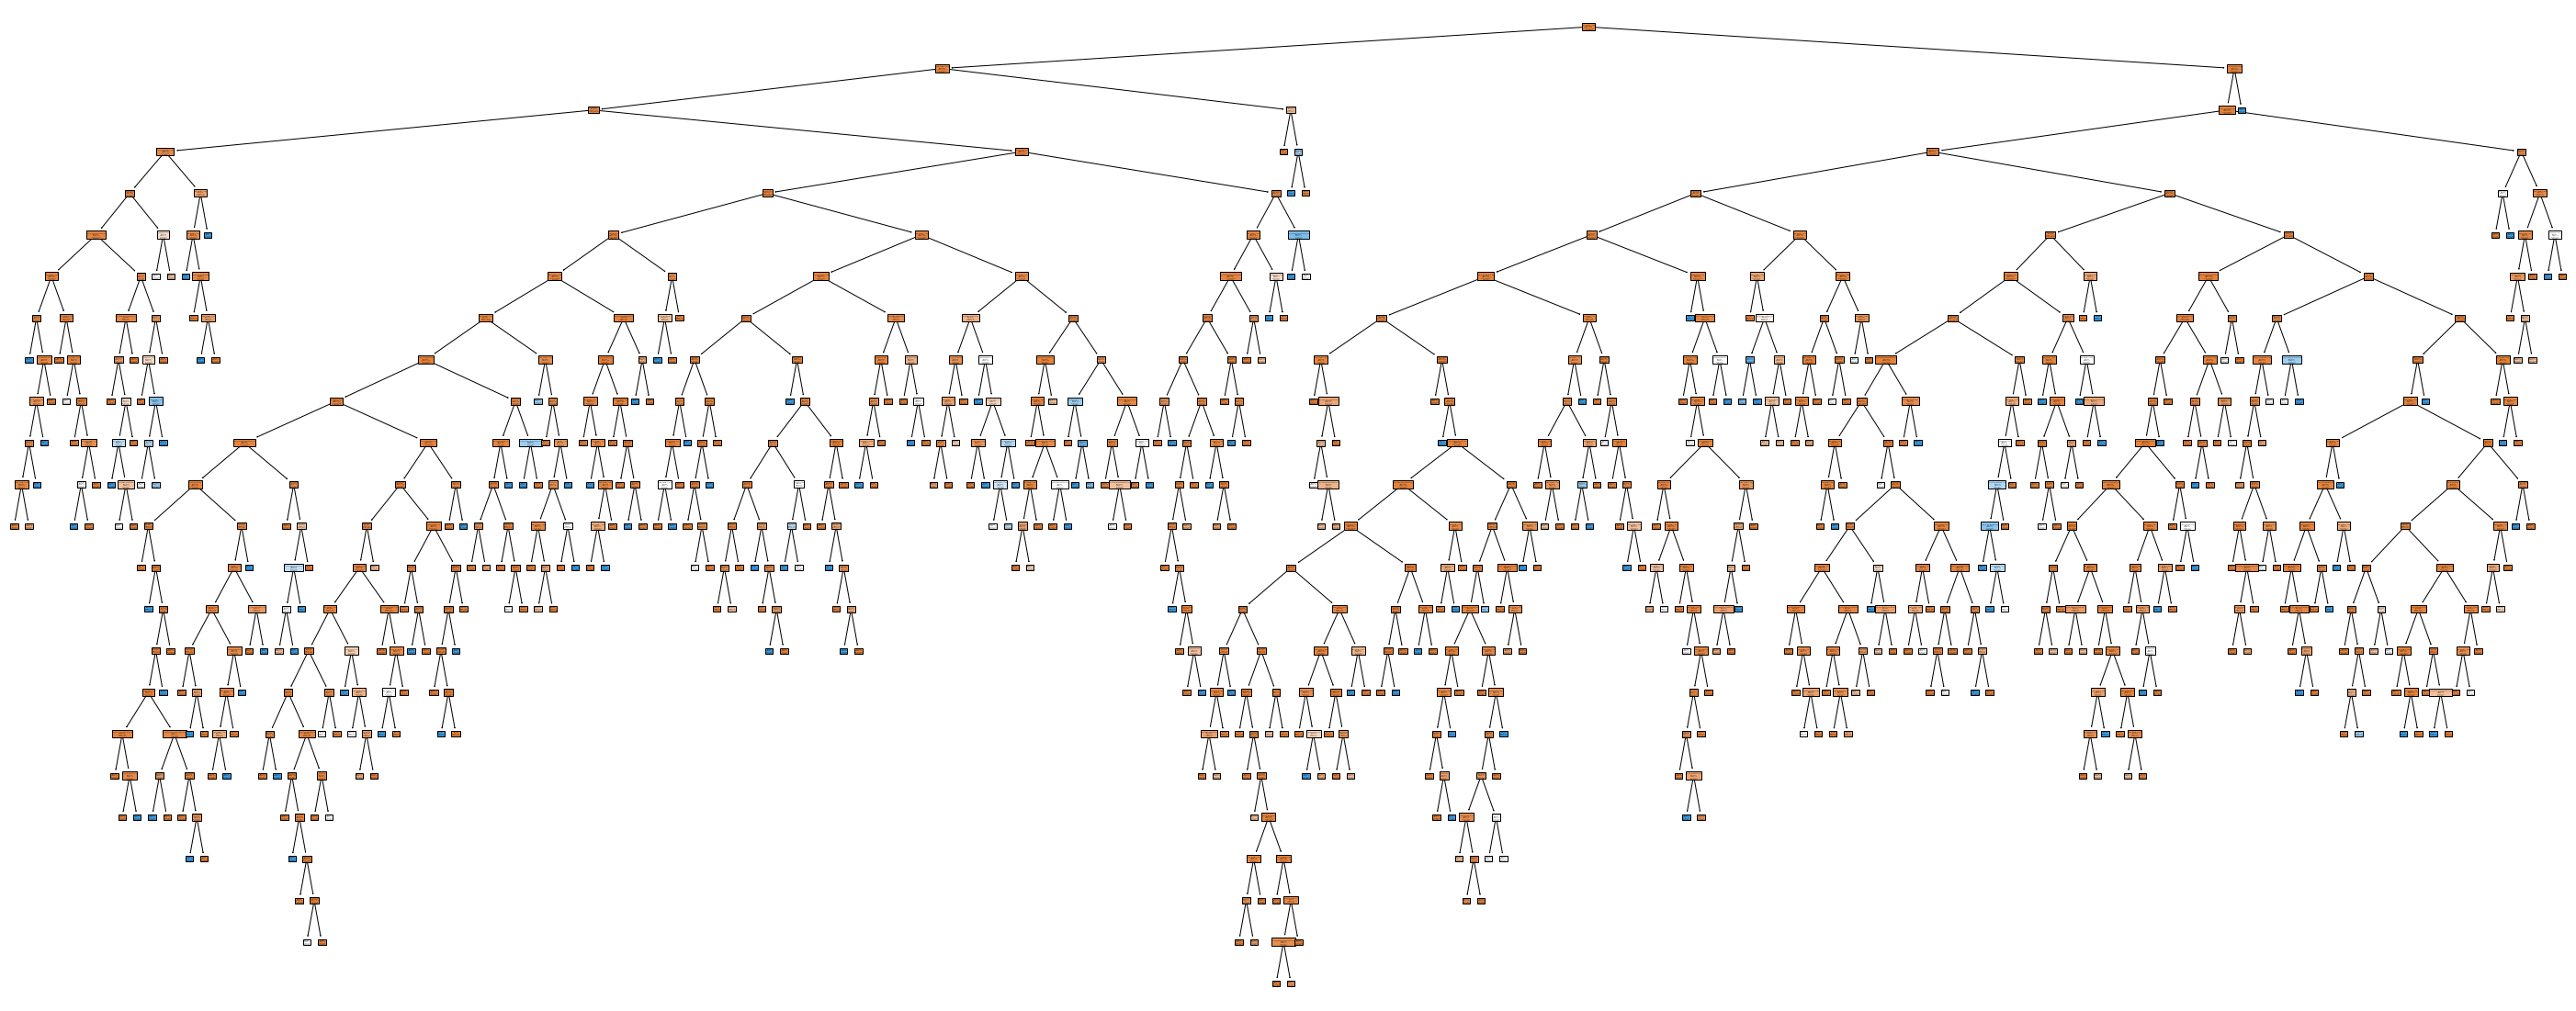

In [68]:
plt.figure(figsize=(50, 20))
plot_tree(clf,
          filled=True,
          class_names=['bom', 'mau'],
          feature_names=x_train.columns);

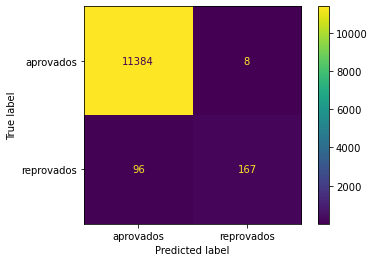

In [69]:
predictions = clf.predict(x_train)
cm = confusion_matrix(y_train, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['aprovados', 'reprovados'])
disp.plot()

In [70]:
accuracy_score(y_train, predictions)

0.991076791076791

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [71]:
clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(x_test, y_test)


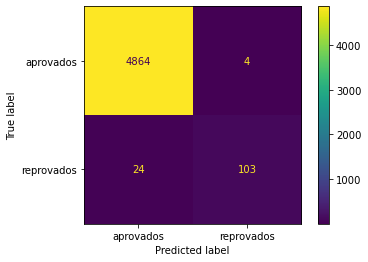

In [72]:
predictions = clf.predict(x_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['aprovados', 'reprovados'])
disp.plot()

In [73]:
accuracy_score(y_test, predictions)

0.9943943943943944

In [74]:
# 5 por folha, profundidade de 10,random_state = 123

clf = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)
clf = clf.fit(x_test, y_test)


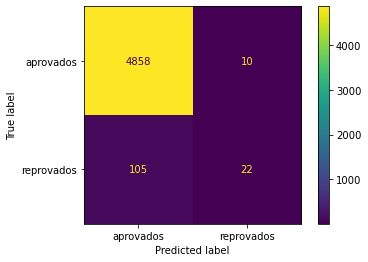

In [75]:
predictions = clf.predict(x_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['aprovados', 'reprovados'])
disp.plot()

In [76]:
accuracy_score(y_test, predictions)

0.9769769769769769